The equation being used in code is a discrete-time implementation of the filter.

The differential equation) of a PT1 is: T * y'(t) + y(t) = K * u(t), where y' = dy/dt

In order to create a discrete-time filter from the continuous-time dynamics, you can use a first order approximation (backwards difference, specifically) of the derivative of y: dy/dt ~ (y(t) - y(t - dt)) / dt

If we use the notation k to denote a sample taken at time t and k-1 to denote a sample taken at time t-dt, then we can derive the equation used in code as follows:

T * dy/dt + y(t) = K * u(t)

T * (y(k) - y(k-1)) / dt + y(k) = K * u(k)

(T/dt + 1) * y(k) = K * u(k) + T/dt * y(k-1)

Now let K=1 and C=T/dt, and you get:

(C+1) * y(k) = u(k) + C * y(k-1)

And, from there:
y(k) = (u(k) + C * y(k-1)) / (C+1)

Some links:
 - https://kiritchatterjee.wordpress.com/2014/11/10/a-simple-digital-low-pass-filter-in-c/
 - https://engineering.stackexchange.com/questions/13516/pt1-filter-without-derivative
 - https://www.mikrocontroller.net/attachment/149882/schift-filter-tp.pdf
 - http://www.dspguide.com/pdfbook.htm

In [1]:
import matplotlib.pyplot as plt
import random

T=1.0 -> C=10.0 -> beta=0.09090909090909091


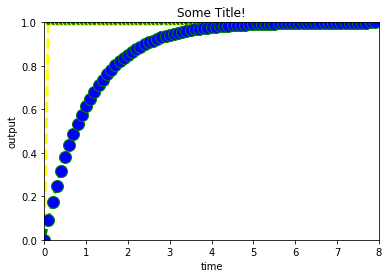

In [2]:
n = 80
dt = 0.1
t = [dt * t for t in range(n)]
x = [1.0 if t else 0.0 for t in range(n)]

# Time Constant for the Filter
T = 1.0

C = T / dt
beta = 1.0 / (C + 1.0)
print(f"T={T} -> C={C} -> beta={beta}")

y = [float('nan') for t in range(n)]
ly = 0.0
for k in range(n):
    y[k] = beta * x[k] + (1.0 - beta) * ly
    ly = y[k]

#print(t)
#print(x)
#print(y)

plt.plot(t, x, color='yellow', linestyle='dashed', linewidth = 3, marker='.', markerfacecolor='green', markersize=12) 
plt.plot(t, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
  
# setting x and y axis range 
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 8.0)
 
plt.title('Some Title!') 

plt.xlabel('time') 
plt.ylabel('output') 

plt.show() 

T=1.0 -> C=1.0 -> beta=0.5


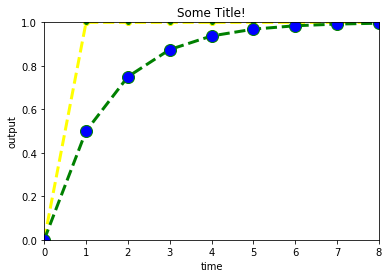

In [3]:
n = 50
dt = 1.0
t = [dt * t for t in range(n)]
x = [1.0 if t else 0.0 for t in range(n)]

# Time Constant for the Filter
T = 1.0

C = T / dt
beta = 1.0 / (C + 1.0)
print(f"T={T} -> C={C} -> beta={beta}")

y = [float('nan') for t in range(n)]
ly = 0.0
for k in range(n):
    y[k] = beta * x[k] + (1.0 - beta) * ly
    ly = y[k]

#print(t)
#print(x)
#print(y)

plt.plot(t, x, color='yellow', linestyle='dashed', linewidth = 3, marker='.', markerfacecolor='green', markersize=12) 
plt.plot(t, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
  
# setting x and y axis range 
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 8.0)
 
plt.title('Some Title!') 

plt.xlabel('time') 
plt.ylabel('output') 

plt.show() 

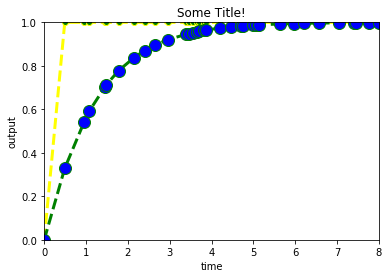

In [4]:
n = 50
t = [float('nan') for t in range(n)]
t = [dt * t for t in range(n)]

# Time Constant for the Filter
T = 1.0

lt = 0.0
for k in range(n):
    t[k] = lt + random.uniform(0, 0.5)
    lt = t[k]

x = [1.0 if t else 0.0 for t in range(n)]
y = [float('nan') for t in range(n)]

ly = 0.0
lt = 0.0
dt = 0.1
for k in range(n):
    dt = t[k] - lt
    C = T / dt
    beta = 1.0 / (C + 1.0)
    #print(f"T={T} -> C={C} -> beta={beta}")

    y[k] = beta * x[k] + (1.0 - beta) * ly
    ly = y[k]
    lt = t[k]

#print(t)
#print(x)
#print(y)

plt.plot(t, x, color='yellow', linestyle='dashed', linewidth = 3, marker='.', markerfacecolor='green', markersize=12) 
plt.plot(t, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
  
# setting x and y axis range 
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 8.0)
 
plt.title('Some Title!') 

plt.xlabel('time') 
plt.ylabel('output') 

plt.show() 